


##Le test d'Ishihara

Ce test, inventé en 1917 par Shinobu Ishihara, est un recueil de 38 planches utilisé pour dépister les anomalies de la vision des couleurs dont quelques exemples sont illustrés figure 1.

<img src="ExTP1.png" width="800" height="600"  >


Ces tests composés de planches « pseudoisochromatiques » sont les plus fréquemment utilisés pour la détection des déficiences congénitales des teintes rouge et verte. Quelques-uns testent aussi les anomalies concernant la perception du bleu. 




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image


from mpl_toolkits.mplot3d import Axes3D

## Corrélations et contrastes des planches RVB

Les lignes suivantes lit l'image $ishihara-0.png$ codée en RVB
(Rouge, Vert, Bleu) et la stocke dans une matrice tridimensionnelle $I$ de taille $hauteur \times largeur \times 3$. 

On peut séparer cette matrice en trois sous-matrices bidimensionnelles appelées canaux : $R = I(i,j,1)$ pour le canal rouge, $V = I(i,j,2)$ pour le canal vert, et $B = I(i,j,3)$ pour le canal bleu. 

Chacun d'entre eux est composé d'entiers compris entre 0 et 255, qui représentent l'intensité lumineuse du pixel situé sur la ligne $i$ et la colonne $j$. De part leur dénomination, chaque canal apporte donc une part de couleur à l'image, que ce soit du rouge, du vert ou du bleu.

### Représentations R, V et B

Chargement de l'image 

float32
(1536, 1985, 4)
(1536, 1985)
la taille (1536, 1985, 4)
1.0


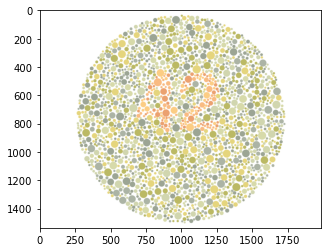

In [3]:
 # charge le fichier dans une matrice de pixels couleur.
Data=image.imread("ishihara-0.png")

# affiche les dimensions de la matrice.
print(Data.dtype)
print(Data.shape)
print(Data.shape[0:2])
print("la taille",Data.shape)

# accède à la valeur du premier pixel.
print(Data[0,0,0]) 


# Visualisation image
plt.imshow(Data) 
plt.show()

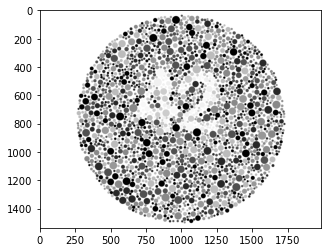

In [4]:
# Decoupage de l'image en trois canaux et conversion en doubles :
R=Data[:,:,0]
V=Data[:,:,1]
B=Data[:,:,2]

# Affichage du canal R :
plt.imshow(R,cmap='gray') 
plt.show()


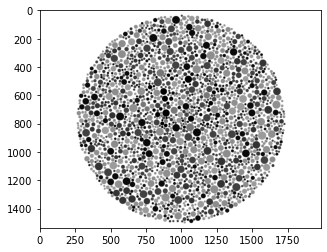

In [5]:
# Affichage du canal V :
plt.imshow(V,cmap='gray') 
plt.show()



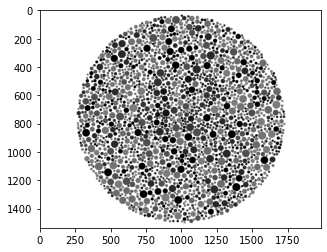

In [6]:
# Affichage du canal B :
plt.imshow(B,cmap='gray') 
plt.show()



En affichant les matrices $I$, $R$, $V$ et $B$ sous forme d’images, on observe que les images sont similaires et on distingue un motif dans les nuances de rouge.

Dans la suite, les pixels sont considérés comme des points de $R^3$ que l’on affiche dans un repère dont les axes correspondent aux trois niveaux de couleur.

(3048960,)


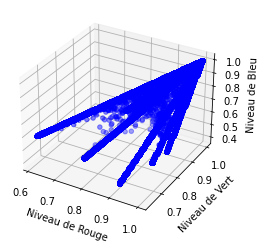

In [7]:
# Transformation image en nuage de pixels 3D : les trois canaux sont vectorises et concatenes
R=np.ravel(R)
V=np.ravel(V)
B=np.ravel(B)

print(R.shape)

# Affichage du nuage de pixels dans le repere RVB :
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R, V, B, c='b', marker='o')

ax.set_xlabel('Niveau de Rouge')
ax.set_ylabel('Niveau de Vert')
ax.set_zlabel('Niveau de Bleu')

plt.show()

 Ils forment un faisceau allongé suivant plusieurs directions, ce qui confirme l’observation précédente, à savoir que les trois canaux sont fortement corrélés.

### Etude de la corrélation entre les couleurs R, V et B

In [8]:
# Matrice des donnees :
dim=R.shape[0]

# Les trois canaux sont vectorises et concatenes
X=np.zeros([dim,3])
X[:,0]=R
X[:,1]=V
X[:,2]=B

print(X.shape)

(3048960, 3)


In [9]:
# Calcul de la matrice de variance/covariance 
n=X.shape[0]
sigma=np.dot(X.T,X)/n
print(sigma)


[[0.87237762 0.86682694 0.8119365 ]
 [0.86682694 0.86298409 0.81023239]
 [0.8119365  0.81023239 0.77489049]]


In [10]:
# Calcul des coefficients de correlation lineaire (np.corrcoef)
corrR_V=sigma[1,0]/np.sqrt(sigma[0,0]*sigma[1,1])
print(corrR_V)
corrR_B=sigma[0,2]/np.sqrt(sigma[0,0]*sigma[2,2])
print(corrR_B)
corrV_B=sigma[1,2]/np.sqrt(sigma[1,1]*sigma[2,2])
print(corrV_B)

0.9990304991578245
0.9875285058335591
0.9908046568975205


In [11]:
# Calcul des proportions de contraste :
prop_R= sigma[0,0]/(sigma[0,0]+sigma[1,1]+sigma[2,2])
prop_V= sigma[1,1]/(sigma[0,0]+sigma[1,1]+sigma[2,2])
prop_B=sigma[2,2]/(sigma[0,0]+sigma[1,1]+sigma[2,2])
print(prop_R, prop_V,prop_B)

0.34752588633933695 0.3437838209500389 0.30869029271062404


##  Analyse en Composantes Principales



Pour implémenter l'ACP, nous allons suivre ces étapes :
1) extraire les 3 vecteurs propres, notés $X_1$, $X_2$, $X_3$, associés aux 3 plus grandes valeurs propres de la matrice de variance-covariance $\Sigma$ (par les fonctions *np.cov* et *np.linalg.eig*). Ces vecteurs propres constitueront le nouveau &
repère P c'est-à-dire les axes principaux.  
2) Projeter ensuite les données dans cette nouvelle base en les multipliant par la base $P = [X_1X_2X_3]$.

In [12]:
# Matrice des donnees :
dim=R.shape[0]

# Les trois canaux sont vectorises et concatenes
X=np.zeros([dim,3])
X[:,0]=R
X[:,1]=V
X[:,2]=B

print(X[:,0].shape)

(3048960,)


Calcul de la matrice de variance-covariance en utilisant par exemple la fonction **np.cov**

In [13]:
# Matrice de variance/covariance :
newsigma=np.cov(X.T)
newsigma

array([[0.01436858, 0.01332363, 0.02051962],
       [0.01332363, 0.01396285, 0.02297154],
       [0.02051962, 0.02297154, 0.0448974 ]])

La matrice $\Sigma$ de variance/covariance est symétrique et réelle. Elle admet donc une base orthonormée de vecteurs propres.

Calcul de ses valeurs propres et vecteurs propres à l'aide de l'appel à la fonction **np.linalg.eig**

In [14]:
# Calcul des valeurs/vecteurs propres de Sigma :
eigval,eigvec=np.linalg.eig(newsigma)
print(eigval)
print('----')
print(eigvec)

[0.0681779  0.00461629 0.00043465]
----
[[-0.4130039  -0.75423633  0.51044621]
 [-0.4394815  -0.32585122 -0.83706451]
 [-0.79767399  0.57004257  0.19689509]]


In [15]:
#  Tri des valeurs propres :
eigval=np.sort(eigval)
eigval

array([0.00043465, 0.00461629, 0.0681779 ])

 Calcul de la matrice des **composantes principales** des pixels  Projetons ensuite les données dans cette nouvelle base en multipliant chaque vecteur par la base $P = [X_1X_2X_3]$.

In [16]:
# Calcul des composantes principales 
#c'est à dire des coefficients de projection sur les axes principaux:
CP=np.dot(X,eigvec)
CP


array([[-1.65015939, -0.51004498, -0.12972321],
       [-1.65015939, -0.51004498, -0.12972321],
       [-1.65015939, -0.51004498, -0.12972321],
       ...,
       [-1.65015939, -0.51004498, -0.12972321],
       [-1.65015939, -0.51004498, -0.12972321],
       [-1.65015939, -0.51004498, -0.12972321]])

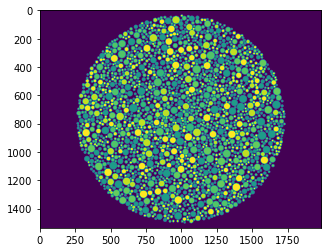

In [17]:
# Projection sur la premiere composante principale :
axe1=np.reshape(CP[:,0],Data.shape[0:2])
val=np.zeros(axe1.shape)





# Affichage de cette projection
plt.imshow(axe1)
plt.show()


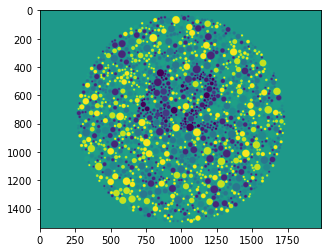

In [18]:
# Projection sur la deuxieme composante principale :
axe2=np.reshape(CP[:,1],Data.shape[0:2])

# Affichage de cette projection
plt.imshow(axe2)
plt.show()




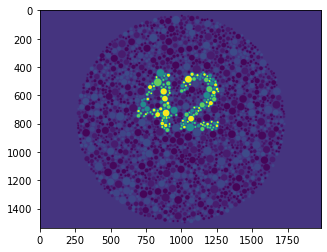

In [19]:
# Projection sur la troisieme composante principale :
axe3=np.reshape(CP[:,2],Data.shape[0:2])

# Affichage de cette projection
plt.imshow(axe3)
plt.show()




## Etude la correlation dans le nouveau repère

In [20]:
# Matrice de variance/covariance dans le nouveau repere :
matrix_var_cov=np.cov(CP.T)
matrix_var_cov



array([[6.81779017e-02, 2.23691865e-16, 4.16323914e-16],
       [2.23691865e-16, 4.61628851e-03, 5.93724499e-16],
       [4.16323914e-16, 5.93724499e-16, 4.34645801e-04]])

In [21]:
# Coefficients de correlation lineaire :
corrR_V=matrix_var_cov[1,0]/np.sqrt(matrix_var_cov[0,0]*matrix_var_cov[1,1])
print(corrR_V)
corrR_B=matrix_var_cov[0,2]/np.sqrt(matrix_var_cov[0,0]*matrix_var_cov[2,2])
print(corrR_B)
corrV_B=matrix_var_cov[1,2]/np.sqrt(matrix_var_cov[1,1]*matrix_var_cov[2,2])
print(corrV_B)


1.2609036508513044e-14
7.647892911781865e-14
4.191512386753322e-13


In [22]:
# Proportions de contraste :

prop_R= matrix_var_cov[0,0]/(matrix_var_cov[0,0]+matrix_var_cov[1,1]+matrix_var_cov[2,2])
prop_V= matrix_var_cov[1,1]/(matrix_var_cov[0,0]+matrix_var_cov[1,1]+matrix_var_cov[2,2])
prop_B=matrix_var_cov[2,2]/(matrix_var_cov[0,0]+matrix_var_cov[1,1]+matrix_var_cov[2,2])
print(prop_R,prop_V,prop_B)

0.9310253366979578 0.06303921731007207 0.0059354459919700765


### Interprétation

Le but du test de Ishihara est d'identifier les personnes qui ne distinguent pas, dans une image de luminance à peu près uniforme, un motif n'apparaissant que dans les chrominances. Il est donc voulu que l'on ne distingue le motif que dans la deuxième et/ou la troisième composante(s) principale(s). 

**Comment est-ce possible puisque le contraste est censé être maximal dans la première composante principale ?**

S. Ishihara a justement créé des images de sorte que le contraste soit faible entre les couleurs du motif et celles du reste de l'image, alors qu'il y a un fort contraste dans la luminance, grâce au fait que ses images contiennent beaucoup de pixels blancs (entre les taches colorées). 



## Test

Des symboles de la culture Geek se cachent dans des mosaïques d'Ishihara (archive *Quizz_GroupeXX.zip*).

Utilisons l'ACP pour les faire apparaître et à vous de les identifier !

In [23]:
import glob
filelist = glob.glob('testquizz/*.png')

In [24]:
def apparition_with_ACP(file_name):
    data_file=image.imread(file_name)
    R=data_file[:,:,0]
    V=data_file[:,:,1]
    B=data_file[:,:,2]
   #on vectorise les caneaux
    R=np.ravel(R)
    V=np.ravel(V)
    B=np.ravel(B)



    # Matrice des donnees :
    dim=R.shape[0]

    # Les trois canaux sont vectorises et concatenes
    X=np.zeros([dim,3])
    X[:,0]=R
    X[:,1]=V
    X[:,2]=B
    #calcule de la matrice var/cov des données
    sig=np.dot(X.T,X)/X.shape[0]

    vp,vecs=np.linalg.eig(sig)
    vp=np.sort(vp)
    #composantes principales
    cp=np.dot(X,vecs)

    #on projette sur la 3e comp principales
    axe_2= np.reshape(cp[:,1],data_file.shape[0:2])
    axe_3=np.reshape(cp[:,2],data_file.shape[0:2])
    
    return axe_2,axe_3


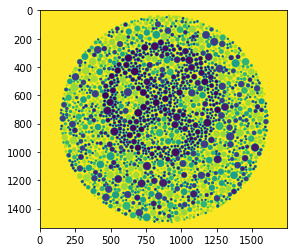

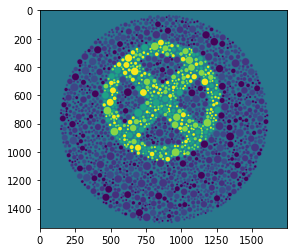

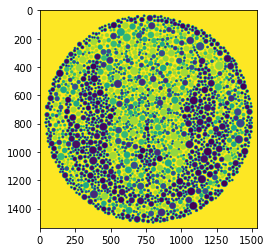

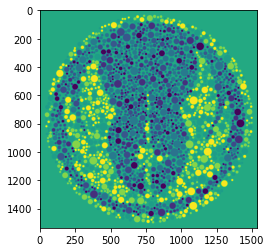

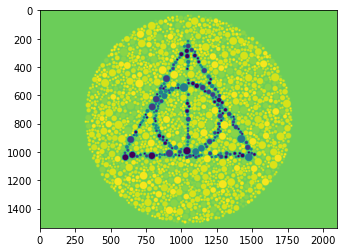

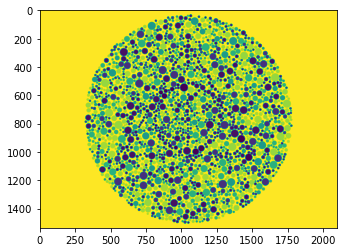

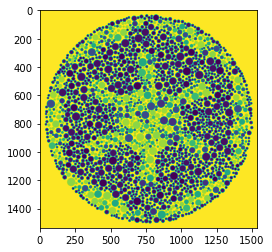

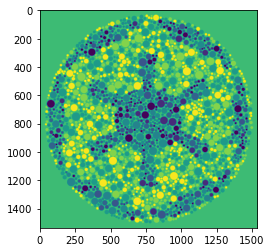

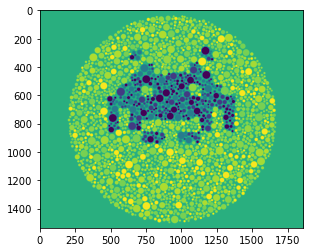

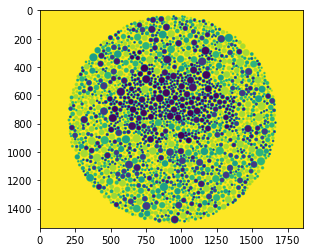

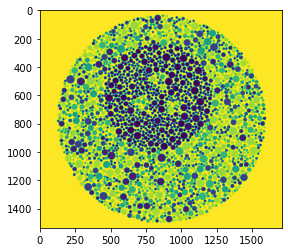

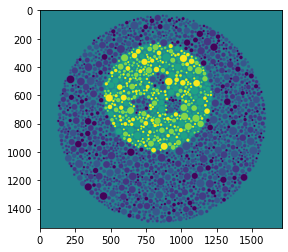

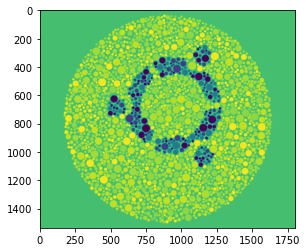

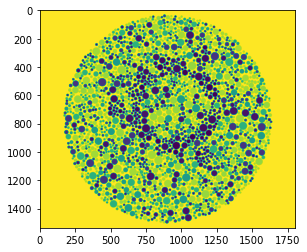

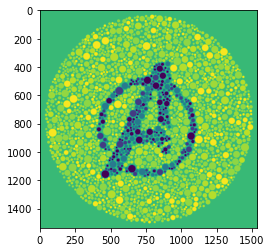

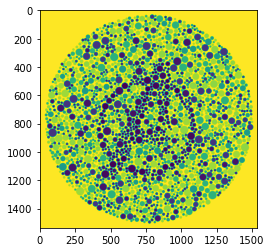

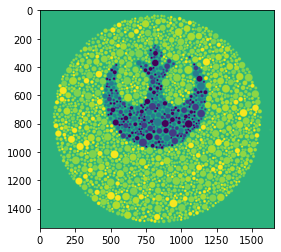

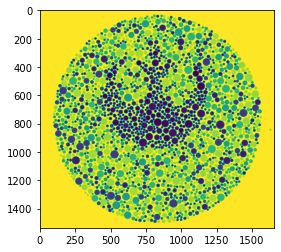

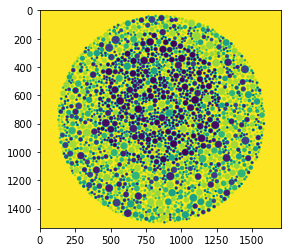

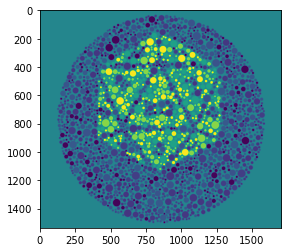

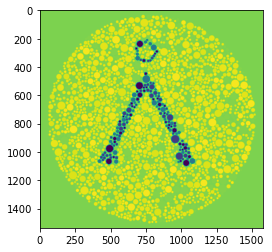

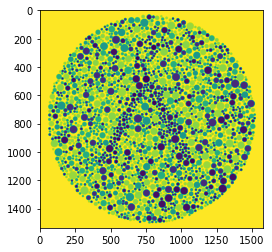

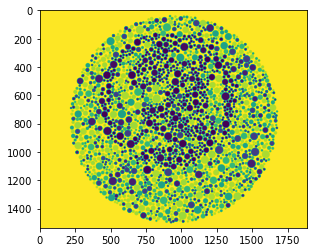

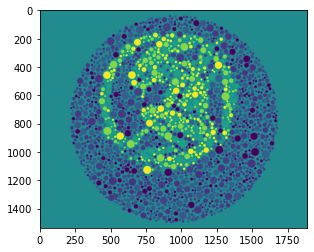

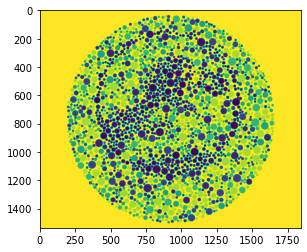

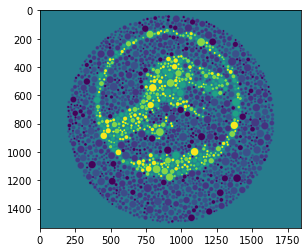

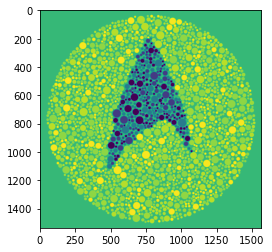

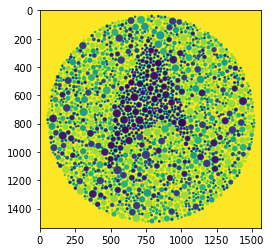

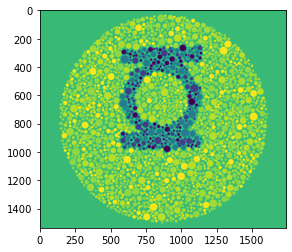

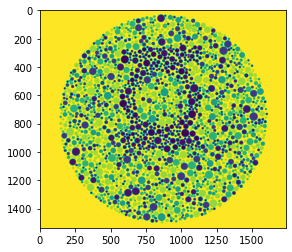

In [25]:
for i in range(len(filelist)):
    plt.figure()
    axe2,axe3=apparition_with_ACP(filelist[i])
    plt.imshow(axe2)
    plt.show()
    plt.imshow(axe3)
    plt.show()